In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import linregress

In [2]:
file = "Resources/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040.csv"

In [3]:
# Read and display the CSV with Pandas
mobility_stlc_df = pd.read_csv("Resources/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040.csv")
mobility_stlc_df.head()

,geoid,name,B07009001,"B07009001, Error",B07009002,"B07009002, Error",B07009003,"B07009003, Error",B07009004,"B07009004, Error",...,B07009032,"B07009032, Error",B07009033,"B07009033, Error",B07009034,"B07009034, Error",B07009035,"B07009035, Error",B07009036,"B07009036, Error"
0,05000US29189,"St. Louis County, MO",689502,113,46247,1520,146184,2770,199438,3215,...,324,120,480,201,486,168,877,268,580,183
1,86000US63005,63005,11879,461,97,57,824,133,1965,246,...,0,17,12,17,12,17,7,11,42,48
2,86000US63011,63011,26481,657,1231,434,3792,484,6548,579,...,0,23,0,23,0,23,26,36,12,21
3,86000US63017,63017,30786,672,637,173,3873,391,6243,590,...,36,46,0,23,14,22,77,86,12,19
4,86000US63021,63021,39205,706,1287,300,5947,483,10013,660,...,20,33,3,19,0,26,49,80,50,82


In [4]:
red_mobility_stlc_df = mobility_stlc_df[['name','B07009001','B07009002','B07009003','B07009004','B07009005','B07009006']]
red_mob_stlc_df = red_mobility_stlc_df.rename({'B07009001': 'Total',
'B07009002': 'Less than high school graduate',
'B07009003': 'High school graduate',
'B07009004': "Some college or associate's degree",
'B07009005': "Bachelor's degree",
"B07009006": "Graduate or professional degree"},axis=1)
red_mob_stlc_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [5]:
red_mob_stlc_df = red_mobility_stlc_df.rename({'B07009001': 'Total',
'B07009002': 'Less than high school graduate',
'B07009003': 'High school graduate',
'B07009004': "Some college or associate's degree",
'B07009005': "Bachelor's degree",
"B07009006": "Graduate or professional degree"},axis=1)
red_mob_stlc_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [6]:
# Read and display the CSV with Pandas
house_educ_df = pd.read_csv('Resources/acs2018_5yr_B06009_86000US63040/acs2018_5yr_B06009_86000US63040/acs2018_5yr_B06009_86000US63040.csv')
house_educ_df.head()


,geoid,name,B06009001,"B06009001, Error",B06009002,"B06009002, Error",B06009003,"B06009003, Error",B06009004,"B06009004, Error",...,B06009026,"B06009026, Error",B06009027,"B06009027, Error",B06009028,"B06009028, Error",B06009029,"B06009029, Error",B06009030,"B06009030, Error"
0,05000US29189,"St. Louis County, MO",689502,113,46247,1520,146184,2770,199438,3215,...,7845,901,10259,880,10297,829,13579,775,18173,828
1,86000US63005,63005,11879,461,97,57,824,133,1965,246,...,35,48,114,52,181,74,337,114,1144,211
2,86000US63011,63011,26481,657,1231,434,3792,484,6548,579,...,525,336,388,157,586,227,630,171,747,205
3,86000US63017,63017,30786,672,637,173,3873,391,6243,590,...,136,75,386,169,512,216,1340,271,2291,262
4,86000US63021,63021,39205,706,1287,300,5947,483,10013,660,...,522,222,568,219,451,153,1224,219,1483,278


In [7]:
redu_house_educ_df = house_educ_df[['name','B06009001','B06009002','B06009003','B06009004','B06009005','B06009006']]
redu_house_educ_df.head()

,name,B06009001,B06009002,B06009003,B06009004,B06009005,B06009006
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [8]:
redu_house_educ_df = redu_house_educ_df.rename({'B06009001': 'Total',
'B06009002': 'Less than high school graduate',
'B06009003': 'High school graduate',
'B06009004': "Some college or associate's degree",
'B06009005': "Bachelor's degree",
"B06009006": "Graduate or professional degree"},axis=1)
redu_house_educ_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [9]:
redu_house_educ_df = redu_house_educ_df.rename({'B06009001': 'Total',
'B06009002': 'Less than high school graduate',
'B06009003': 'High school graduate',
'B06009004': "Some college or associate's degree",
'B06009005': "Bachelor's degree",
"B06009006": "Graduate or professional degree"},axis=1)
redu_house_educ_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [10]:
# Calculate the sum of each column
cols = [ 'Less than high school graduate','High school graduate',"Some college or associate's degree","Bachelor's degree",'Graduate or professional degree']
# redu_house_educ_df[cols].sum(axis=1) #axis=1 makes the summation occur across the rows, rather than down the columns.
# Divide the dataframe by the resulting series
new_df = (redu_house_educ_df[cols].div(redu_house_educ_df[cols].sum(axis=1), axis=0)*100)
new_df.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,6.707305,21.201389,28.924934,24.821683,18.344689
1,0.816567,6.936611,16.541796,37.654685,38.050341
2,4.648616,14.319701,24.727163,33.862014,22.442506
3,2.069122,12.580394,20.278698,33.713376,31.358410
4,3.282745,15.168984,25.540110,33.888535,22.119628


In [11]:
zipcode = ['STLC','63005','63011','63017','63021','63025','63026','63031','63033','63034','63038','63040','63042','63043','63044','63045','63049','63069','63074','63088','63105','63114','63117','63119','63120','63121','63122','63123','63124','63125','63126','63127','63128','63129','63130','63131','63132','63133','63134','63135','63136','63137','63138','63140','63141','63143','63144','63146','63147','63304']
new_df2 = new_df.assign(Zipcode = zipcode)
new_df2 = new_df2.dropna()
new_df2.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Zipcode
0,6.707305,21.201389,28.924934,24.821683,18.344689,STLC
1,0.816567,6.936611,16.541796,37.654685,38.050341,63005
2,4.648616,14.319701,24.727163,33.862014,22.442506,63011
3,2.069122,12.580394,20.278698,33.713376,31.358410,63017
4,3.282745,15.168984,25.540110,33.888535,22.119628,63021


In [12]:
#Regroup education level
Zipcode = new_df2['Zipcode']
Less_than_Bachelor_degree = new_df2['Less than high school graduate'] + new_df2['High school graduate'] + new_df2["Some college or associate's degree"]
Bachelor_degree_to_higher = new_df2["Bachelor's degree"] + new_df2['Graduate or professional degree']
 #New dataframe
educ_zip_df = pd.DataFrame({'Zipcode':Zipcode,"Less than Bachelor's degree":Less_than_Bachelor_degree, "Bachelor's degree and higher":Bachelor_degree_to_higher})
educ_zip_df.head()

,Zipcode,Less than Bachelor's degree,Bachelor's degree and higher
0,STLC,56.833628,43.166372
1,63005,24.294974,75.705026
2,63011,43.695480,56.304520
3,63017,34.928214,65.071786
4,63021,43.991838,56.008162


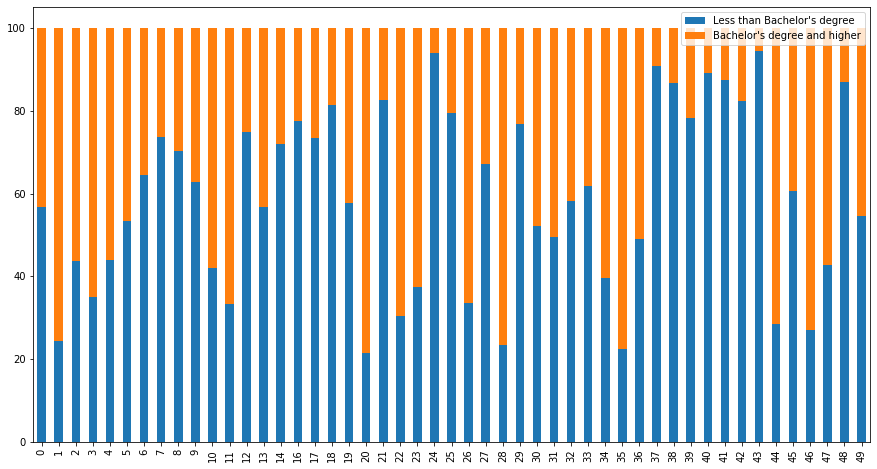

In [13]:
 df2 = educ_zip_df[["Less than Bachelor's degree", "Bachelor's degree and higher"]]
df2.head()
fig = df2.plot(kind='bar', stacked=True,figsize=(15,8))


In [14]:
# Read and display the CSV with Pandas
file6_df = pd.read_csv('Resources/acs2018_5yr_B15011_86000US63040/acs2018_5yr_B15011_86000US63040/acs2018_5yr_B15011_86000US63040.csv')
file6_df.head()


,geoid,name,B15011001,"B15011001, Error",B15011002,"B15011002, Error",B15011003,"B15011003, Error",B15011004,"B15011004, Error",...,B15011035,"B15011035, Error",B15011036,"B15011036, Error",B15011037,"B15011037, Error",B15011038,"B15011038, Error",B15011039,"B15011039, Error"
0,01000US,United States,68867051,316231,32808183,154279,10351233,63893,4610027,34378,...,1147613,7608,773594,5615,533538,4234,2228850,9871,1470323,7735
1,04000US29,Missouri,1181083,9699,549327,5568,176868,2976,69207,1790,...,14391,688,12614,650,9194,597,45736,1133,19689,984
2,05000US29189,"St. Louis County, MO",297633,3191,142360,1812,40890,1158,16682,843,...,4999,379,3902,285,2666,309,11182,490,6351,515
3,86000US63005,63005,8993,410,4616,239,795,176,515,160,...,147,59,102,58,64,41,218,59,127,50
4,86000US63011,63011,14910,659,7609,423,1642,241,502,140,...,216,85,197,92,148,68,600,128,265,91


In [15]:
reduced1_file6_df = file6_df[['name','B15011001','B15011002','B15011003','B15011004','B15011005','B15011006','B15011007','B15011008','B15011009','B15011010','B15011012','B15011013','B15011014','B15011015','B15011016','B15011019','B15011020','B15011021','B15011022','B15011023','B15011025','B15011026','B15011027','B15011028','B15011029','B15011031','B15011032','B15011033','B15011034','B15011035','B15011037','B15011038','B15011039']]
reduced1_file6_df.head()

,name,B15011001,B15011002,B15011003,B15011004,B15011005,B15011006,B15011007,B15011008,B15011009,...,B15011028,B15011029,B15011031,B15011032,B15011033,B15011034,B15011035,B15011037,B15011038,B15011039
0,United States,68867051,32808183,10351233,4610027,565403,2345410,378061,2452332,15451218,...,17161752,4438128,3473255,2897667,4027092,6153918,1147613,533538,2228850,1470323
1,Missouri,1181083,549327,176868,69207,10080,44595,9568,43418,255175,...,302871,62678,65209,67438,62762,101624,14391,9194,45736,19689
2,"St. Louis County, MO",297633,142360,40890,16682,1966,12549,1432,8261,70067,...,76845,18322,18209,12600,16236,29100,4999,2666,11182,6351
3,63005,8993,4616,795,515,38,166,0,76,2879,...,2776,865,760,413,407,658,147,64,218,127
4,63011,14910,7609,1642,502,38,654,63,385,4057,...,4024,772,1043,721,671,1426,216,148,600,265


In [16]:
age_gend_df = reduced1_file6_df[['name','B15011003','B15011009','B15011015','B15011021','B15011028','B15011034']]
age_gend_df
cols = ['B15011003',"B15011009","B15011015","B15011021","B15011028","B15011034"]
#redu_house_educ_df[cols].sum(axis=1) #axis=1 makes the summation occur across the rows, rather than down the columns.
# Divide the dataframe by the resulting series
age_gend_df = (age_gend_df[cols].div(age_gend_df[cols].sum(axis=1), axis=0)*100)
new_df2 = new_df2.dropna()
age_gend_df.head()

,B15011003,B15011009,B15011015,B15011021,B15011028,B15011034
0,11.229038,16.761512,7.599832,39.116732,18.617103,6.675783
1,11.154797,16.093500,7.396924,39.843893,19.101615,6.409272
2,10.131870,17.361452,7.781148,38.474099,19.040929,7.210502
3,6.397361,23.167297,7.580269,35.221695,22.338457,5.294922
4,8.064833,19.926326,9.381139,35.859528,19.764244,7.003929


In [17]:
 age_gend_df.head()


,B15011003,B15011009,B15011015,B15011021,B15011028,B15011034
0,11.229038,16.761512,7.599832,39.116732,18.617103,6.675783
1,11.154797,16.093500,7.396924,39.843893,19.101615,6.409272
2,10.131870,17.361452,7.781148,38.474099,19.040929,7.210502
3,6.397361,23.167297,7.580269,35.221695,22.338457,5.294922
4,8.064833,19.926326,9.381139,35.859528,19.764244,7.003929


In [18]:
# Adding Zipcode as a new column
zipcode = ['USA','MO','STLC','63005','63011','63017','63021','63025','63026','63031','63033','63034','63038','63040','63042','63043','63044','63045','63049','63069','63074','63088','63105','63114','63117','63119','63120','63121','63122','63123','63124','63125','63126','63127','63128','63129','63130','63131','63132','63133','63134','63135','63136','63137','63138','63140','63141','63143','63144','63146','63147','63304']
new_df7 = age_gend_df.assign(Zipcode = zipcode)
# Add Zipcode as the index
new_df7 = new_df7.set_index(['Zipcode'])
new_df7.head()


,B15011003,B15011009,B15011015,B15011021,B15011028,B15011034
Zipcode,,,,,,
USA,11.229038,16.761512,7.599832,39.116732,18.617103,6.675783
MO,11.154797,16.093500,7.396924,39.843893,19.101615,6.409272
STLC,10.131870,17.361452,7.781148,38.474099,19.040929,7.210502
63005,6.397361,23.167297,7.580269,35.221695,22.338457,5.294922
63011,8.064833,19.926326,9.381139,35.859528,19.764244,7.003929


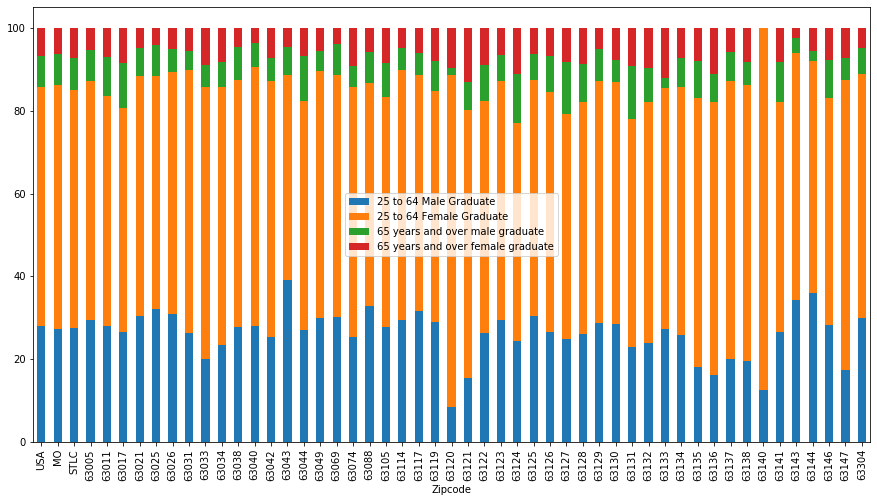

In [19]:
#Regrouping the graduate by active group
#Zipcode = new_df7['Zipcode']
male_graduate_25to64 = new_df7['B15011003'] + new_df7['B15011009']
male_graduate_65over = new_df7['B15011015']
female_graduate_25to64 = new_df7['B15011021'] + new_df7['B15011028']
female_graduate_65over = new_df7['B15011034']
grad_df = pd.DataFrame({'25 to 64 Male Graduate':male_graduate_25to64,'25 to 64 Female Graduate':female_graduate_25to64,'65 years and over male graduate':male_graduate_65over,'65 years and over female graduate':female_graduate_65over})
grad_df = grad_df.dropna()
fig = grad_df.plot(kind='bar', stacked=True,figsize=(15,8))